# Demonstrate PipeNetGen for Seward, Alaska

In [1]:
import time # Record total model run time
time_start = time.time()

In [2]:
# Import PipeNetGen
import pipenetgen as png
# Import other packages
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Load Road Network

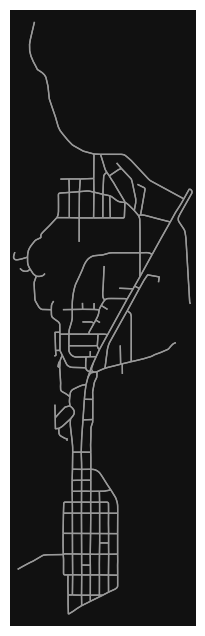

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
# Use OSMNX graph from place method to find driven network for Seward
G = ox.graph_from_place("Seward, Alaska", network_type='drive', simplify=True)
ox.plot_graph(G,node_size=0) # plot

In [4]:
len(G.nodes), len(G.edges) # Info on network

(171, 500)

## Add data

In [5]:
png.assign_meteo_elevation(G) # Assign open-meteo elevation data to each node

In [ ]:
# Assign demands to each node
for node in G.nodes:
    G.nodes[node]['demand'] = 0.5 # 0.5 LPS is quite high but makes network look more interesting

In [7]:
png.add_sources(G,n=1) # Assign a source to be at the lowest point of elevation

In [8]:
G = nx.convert_node_labels_to_integers(G) # Convert nodes to integers that start at 0 to make it easier

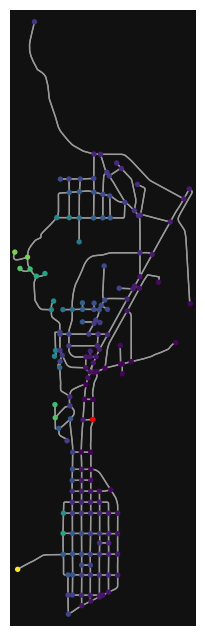

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
# Plot based on elevation data
colors = ox.plot.get_node_colors_by_attr(G,'elevation')
for node in nx.get_node_attributes(G,'special'):
    colors[node] = 'red'

ox.plot_graph(G,node_color=colors,node_size=15) # Where red are sources

1964.037177410326
[<matplotlib.lines.Line2D object at 0x000001F95A0686D0>, <matplotlib.lines.Line2D object at 0x000001F95A6429D0>, <matplotlib.lines.Line2D object at 0x000001F95A642C40>, <matplotlib.lines.Line2D object at 0x000001F95A013100>, <matplotlib.lines.Line2D object at 0x000001F95A642D30>, <matplotlib.lines.Line2D object at 0x000001F95A0133D0>, <matplotlib.lines.Line2D object at 0x000001F95A013160>, <matplotlib.lines.Line2D object at 0x000001F9577C8CA0>, <matplotlib.lines.Line2D object at 0x000001F9577C8B50>, <matplotlib.lines.Line2D object at 0x000001F9577C8DF0>]


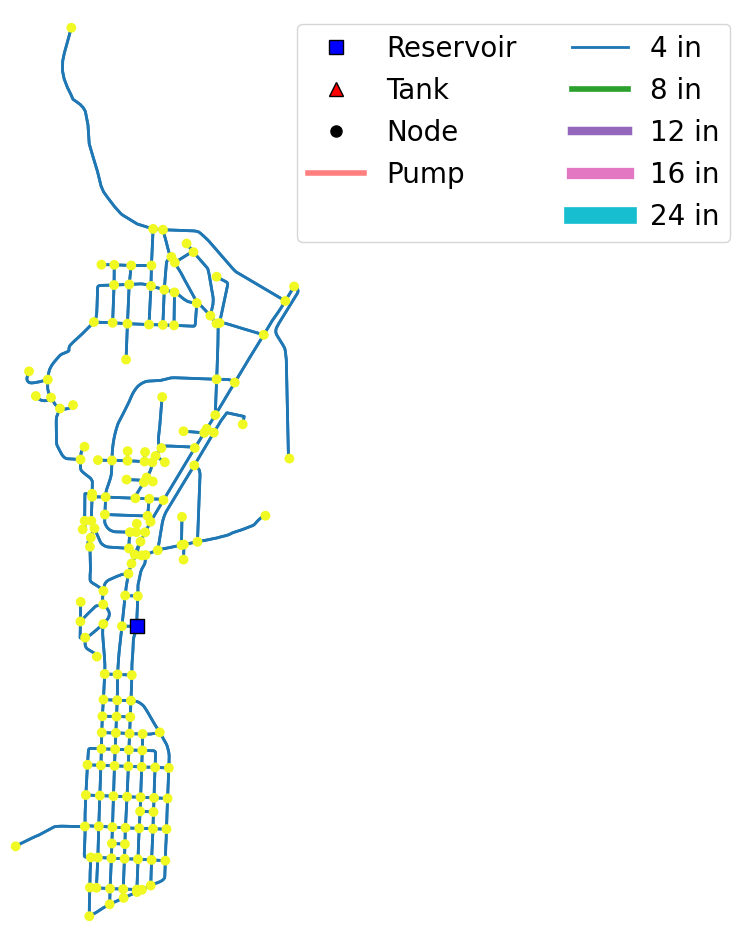

In [10]:
# Plot with pretty plotter
for edge in G.edges:
    G.edges[edge]['diameter'] = 0.1
png.pretty_plot(G,node_color='demand',legend_shift = 2.5)

## Prepare Optimization

In [11]:
# Parameters
parameters = {"MinP": 20, # m
              "MaxP":56, # m
              # base demand
              "demand":0.02, # Lps average demand
              "elev_mult": 1, # elevation multiplier
              # Diam and costs
              "diameters":[0.1016, 0.2032, 0.3048, 0.4064, 0.6], # m
              "cost":[200,219,300,400, 634], # $/m
              # default velocity
              "velocity":1, # m/s
              # Max and min flow
              "QMAX":40, # LPS, must be more than max flow reservoir provides
              "QMIN":0.1, # LPS
              # TOPO
              "link_density":0.0008,  #0.0008
              "node_degree":2, # 2
              "meshedness":0.1, #0.04
              # BIG M
              "BigM_P":200,
              "BigM_Q":41,
              # Pipe roughness
              "C":120, # Roughness Coeff
              # MILP params
              "Gap%":0,
              "TimeLimit":60,
              "MIPFocus":1,
              "verbose":True,
              # Special features
              "min_velo":1,
              'all_edges':True,
              "max_head":85
              }

In [12]:
G.graph['max_head'] = parameters['max_head'] # Transfer to the Graph


In [13]:
# Calculate a potential maximum pressure in the sytstem (This value is high)
ne = nx.get_node_attributes(G,'elevation').values() 
maxP = parameters['MinP'] + max(ne)-min(ne) + 5
maxP

141.0

## Run Clustering

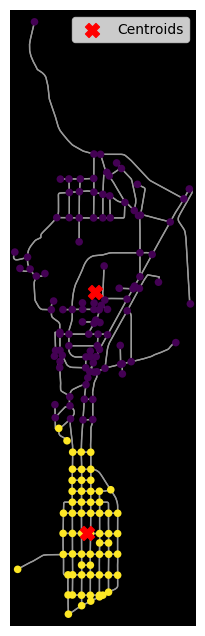

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0, 0]
Neighbor


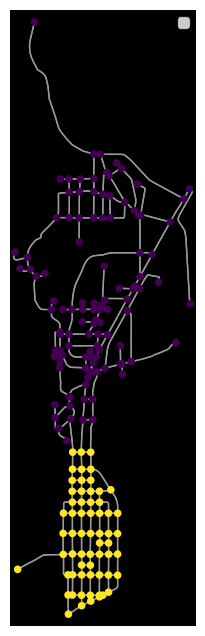

Subgraph 0


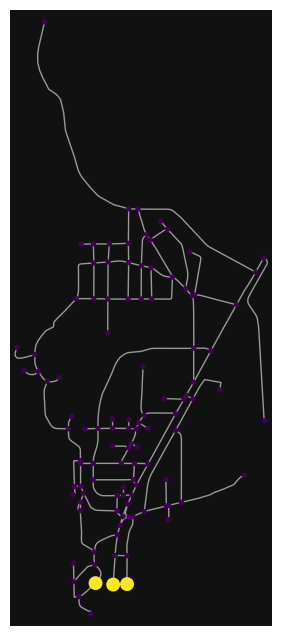

Subgraph 1


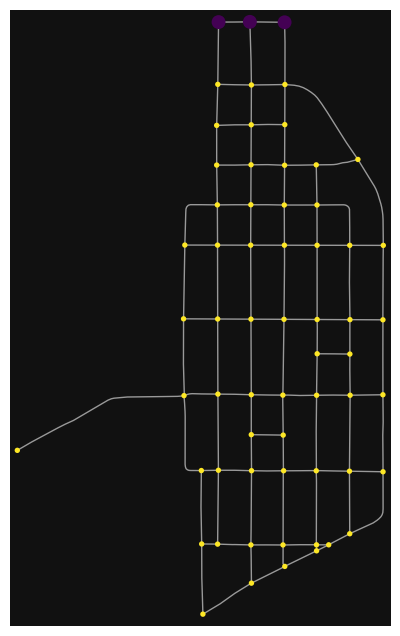

Clusters Are Connected True


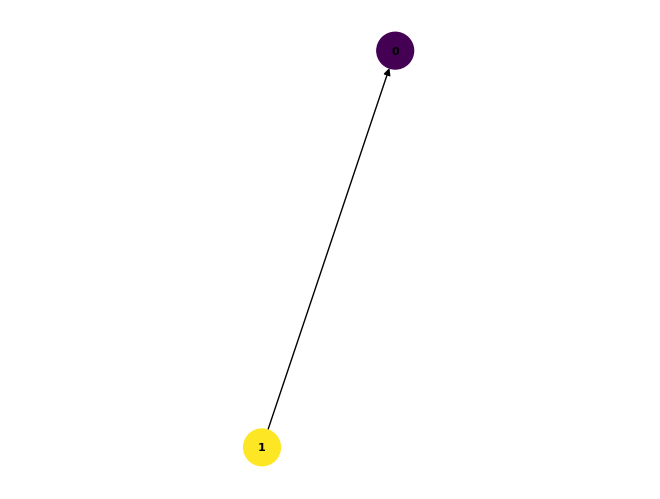

Demand Check
	Total demand: 0.0
Set parameter Username
Academic license - for non-commercial use only - expires 2026-07-07
Network Statistics
	Nodes: 2   Edges: 2
Ready
Set parameter MIPGap to value 0
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 28 columns and 169 nonzeros
Model fingerprint: 0xa3608ccf
Variable types: 16 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [4e-05, 2e+02]
  Objective range  [4e+00, 1e+01]
  Bounds range     [6e-01, 1e+00]
  RHS range        [1e+00, 2e+02]
Found heuristic solution: objective 4.7609355
Presolve removed 41 rows and 28 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterati

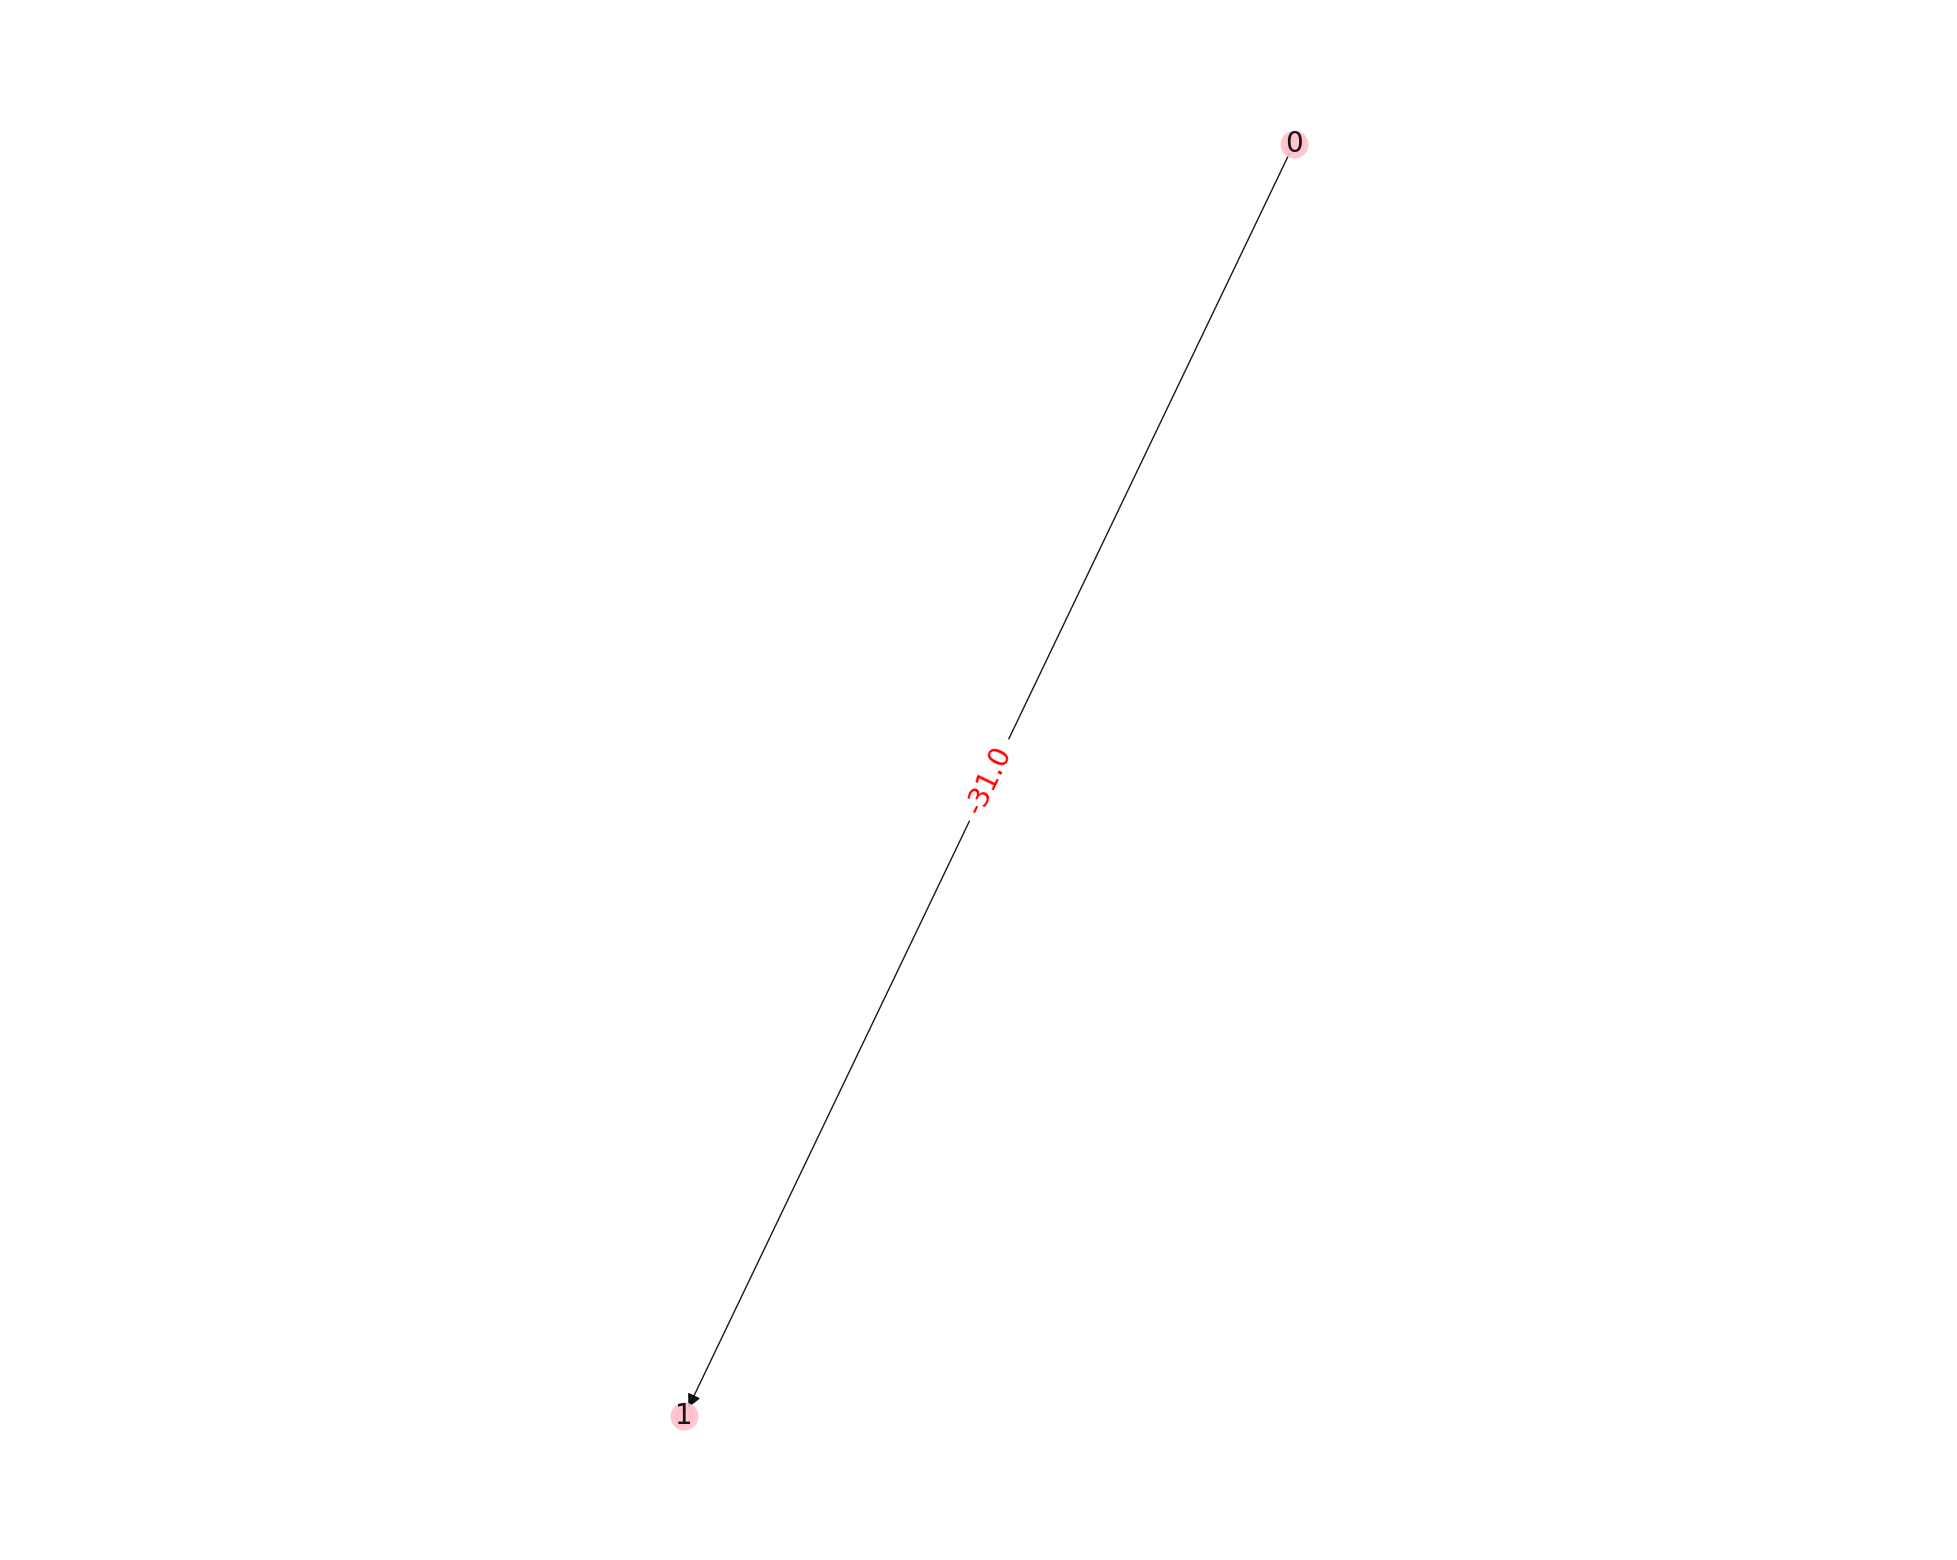

{0: {1: -31.0}, 1: {0: 31.0}} [0, 1]
{'link_density': 0.02402001668056714, 'node_degree': 2.618181818181818, 'meshedness': 0.16279069767441862}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.024 2.6181 0.1627


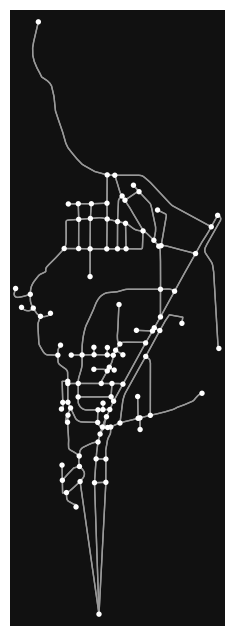

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 110   Edges: 288
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5821 rows, 3679 columns and 35069 nonzeros
Model fingerprint: 0x9c9a7e57
Variable types: 1951 continuous, 1728 integer (1728 binary)
Coefficient statistics:
  Matrix range     [2e-04, 2e+02]
  Objective range  [2e+03, 1e+06]
  Bounds range     [6e-01, 1e+00]
  RHS range        [2e-02, 1e+03]
Presolve removed 3153 rows and 1514 columns
Presolve time: 0.10s
Presolved: 2668 rows, 2165 columns, 17181 nonzeros
Variable types: 670 continuous, 1495 integer (1495 binary)

Root relaxation: objective 5.408898e+06, 1089 iterations, 0.01 seconds (0.02 w

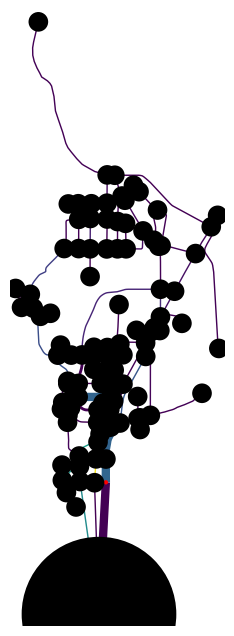

{'link_density': 0.05632360471070148, 'node_degree': 3.492063492063492, 'meshedness': 0.39669421487603307}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.0563 3.492 0.3966


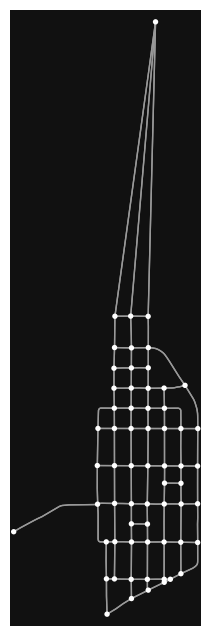

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 63   Edges: 220
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4414 rows, 2769 columns and 28979 nonzeros
Model fingerprint: 0x8829cc8e
Variable types: 1449 continuous, 1320 integer (1320 binary)
Coefficient statistics:
  Matrix range     [5e-04, 2e+02]
  Objective range  [2e+03, 3e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-02, 1e+03]
Presolve removed 2137 rows and 968 columns
Presolve time: 0.05s
Presolved: 2277 rows, 1801 columns, 16999 nonzeros
Variable types: 511 continuous, 1290 integer (1290 binary)

Root relaxation: objective 2.794334e+06, 805 iterations, 0.01 seconds (0.01 work

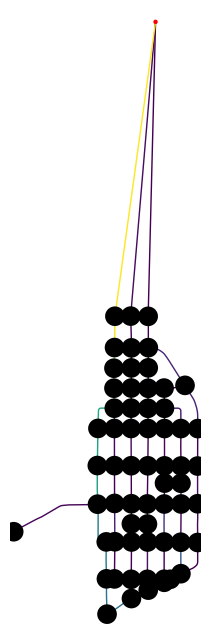

(8, 146)
(20, 19)
(75, 74)


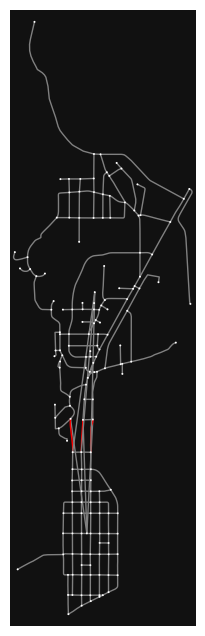

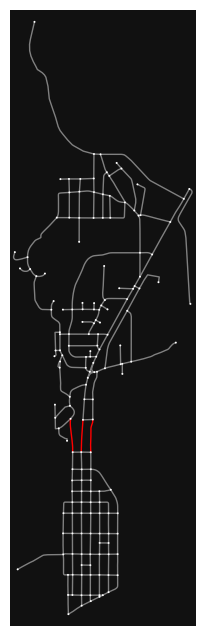

In [14]:
# Define new values for cluster algo
cluster_params = {"QMIN":0,"QMAX":160,"BigM_Q":161,"Gap%":0.24,"min_velo":1,"all_edges": False, "verbose": True,"max_head":1005,'MaxP':maxP,'BigM_P':maxP+1}
# Run cluster algo with 2 clusters
base = png.run_cluster_algorithm(G,2,parameters,show=True,cluster_params=cluster_params)

1964.037177410326
[<matplotlib.lines.Line2D object at 0x000001F95A67F820>, <matplotlib.lines.Line2D object at 0x000001F95CD0B3D0>, <matplotlib.lines.Line2D object at 0x000001F95CD0B6D0>, <matplotlib.lines.Line2D object at 0x000001F95A6985E0>, <matplotlib.lines.Line2D object at 0x000001F95CD0BEB0>, <matplotlib.lines.Line2D object at 0x000001F95A698100>, <matplotlib.lines.Line2D object at 0x000001F95A6986D0>, <matplotlib.lines.Line2D object at 0x000001F95A6982E0>, <matplotlib.lines.Line2D object at 0x000001F95A698850>, <matplotlib.lines.Line2D object at 0x000001F95A698760>]


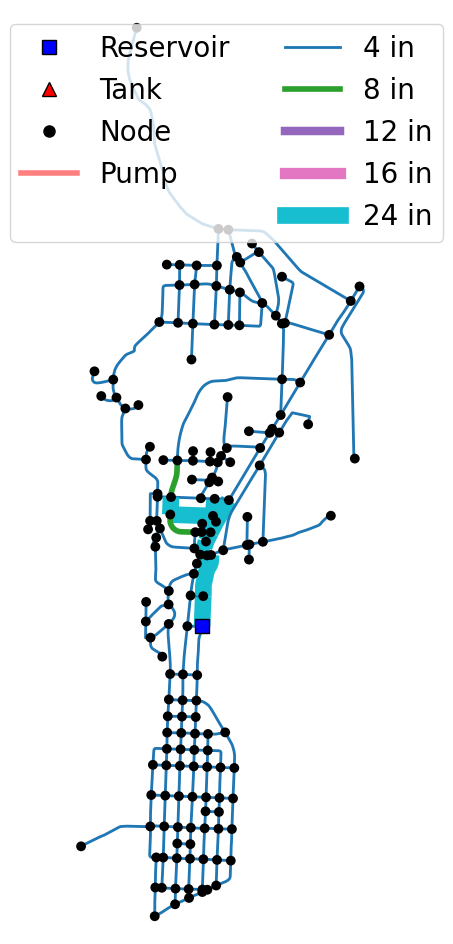

In [15]:
# Showcase output
png.pretty_plot(base)

# Run in EPANET

In [16]:
epa_G = png.run_epanet_algorithm(base,parameters)

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


## Run MILP-EPANET Core

In [17]:
parameters["QMIN"] = 0 # Set a minimum flow
parameters['Gap%'] = 0.05 # A little lee-way on optimality

In [18]:
errors = [png.calculate_pressure_dif(epa_G)] # Difference between EPANET and PipeNetGen MILP
costs = [png.calc_cost(G,parameters)] # Total Cost of Network

In [19]:
# Redefine some parameters
parameters['MaxP'] = maxP
parameters['BigM_P'] = maxP+1
parameters['max_head'] = maxP+10
parameters['QMAX'] = 95
parameters['BigM_Q'] = 96
parameters['TimeLimit'] = 60 # Max of 60 seconds

In [20]:
epa_G2,errors,costs = png.run_a_run(epa_G,parameters,"","",errors,costs,False)

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 171   Edges: 502
Ready
Set parameter MIPGap to value 0.05
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10607 rows, 6366 columns and 60565 nonzeros
Model fingerprint: 0x08370819
Variable types: 3354 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+02]
  Objective range  [3e+03, 1e+06]
  Bounds range     [6e-01, 1e+00]
  RHS range        [5e-01, 2e+02]
Presolve removed 5693 rows and 2445 columns
Presolve time: 0.10s
Presolved: 4914 rows, 3921 columns, 31233 nonzeros
Variable types: 1170 continuous, 2751 integer (2751 binary)

Root relaxation: objective 8.506119e+06, 1860 iterations, 0.02 seconds (0.03

1964.037177410326
[<matplotlib.lines.Line2D object at 0x000001F95D0DF040>, <matplotlib.lines.Line2D object at 0x000001F95CCEF400>, <matplotlib.lines.Line2D object at 0x000001F95CCEF940>, <matplotlib.lines.Line2D object at 0x000001F9577450D0>, <matplotlib.lines.Line2D object at 0x000001F95CCEF760>, <matplotlib.lines.Line2D object at 0x000001F9579D57C0>, <matplotlib.lines.Line2D object at 0x000001F95D628070>, <matplotlib.lines.Line2D object at 0x000001F957517CD0>, <matplotlib.lines.Line2D object at 0x000001F9575170D0>, <matplotlib.lines.Line2D object at 0x000001F957517DC0>]


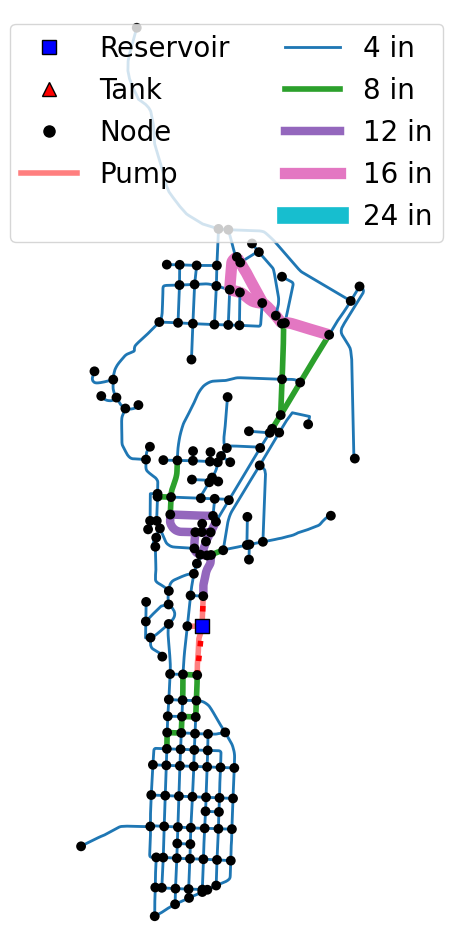

In [21]:
png.pretty_plot(epa_G2)

In [22]:
epa_G3,errors,costs = png.run_a_run(epa_G2,parameters,"","",errors=errors,costs=costs,write=False)

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 171   Edges: 502
Ready
Set parameter MIPGap to value 0.05
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10607 rows, 6366 columns and 60589 nonzeros
Model fingerprint: 0x19c7abee
Variable types: 3354 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+02]
  Objective range  [3e+03, 1e+06]
  Bounds range     [6e-01, 1e+00]
  RHS range        [5e-01, 2e+02]
Presolve removed 5704 rows and 2456 columns
Presolve time: 0.12s
Presolved: 4903 rows, 3910 columns, 31022 nonzeros
Variable types: 1171 continuous, 2739 integer (2739 binary)

Root relaxation: objective 8.507601e+06, 1945 iterations, 0.03 seconds (0.03

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


In [23]:
epa_G4,errors,costs = png.run_a_run(epa_G3,parameters,"","",errors,costs,False)

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 171   Edges: 502
Ready
Set parameter MIPGap to value 0.05
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10607 rows, 6366 columns and 60601 nonzeros
Model fingerprint: 0x64346eae
Variable types: 3354 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+02]
  Objective range  [3e+03, 1e+06]
  Bounds range     [6e-01, 1e+00]
  RHS range        [5e-01, 2e+02]
Presolve removed 5721 rows and 2474 columns
Presolve time: 0.12s
Presolved: 4886 rows, 3892 columns, 30781 nonzeros
Variable types: 1171 continuous, 2721 integer (2721 binary)

Root relaxation: objective 8.539060e+06, 1565 iterations, 0.03 seconds (0.02

In [24]:
epa_G5,errors,costs = png.run_a_run(epa_G4,parameters,"","",errors,costs,False)

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 171   Edges: 502
Ready
Set parameter MIPGap to value 0.05
Set parameter TimeLimit to value 60
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10607 rows, 6366 columns and 60611 nonzeros
Model fingerprint: 0xdade056e
Variable types: 3354 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+02]
  Objective range  [3e+03, 1e+06]
  Bounds range     [6e-01, 1e+00]
  RHS range        [5e-01, 2e+02]
Presolve removed 5720 rows and 2473 columns
Presolve time: 0.12s
Presolved: 4887 rows, 3893 columns, 30794 nonzeros
Variable types: 1172 continuous, 2721 integer (2721 binary)

Root relaxation: objective 8.539060e+06, 1714 iterations, 0.03 seconds (0.03

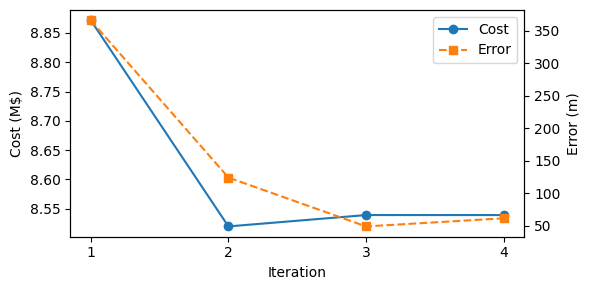

In [25]:
png.plot_error_cost(errors,costs) # Showcase cost and error over iterations

1964.037177410326
[<matplotlib.lines.Line2D object at 0x000001F95A673D90>, <matplotlib.lines.Line2D object at 0x000001F95D3C4940>, <matplotlib.lines.Line2D object at 0x000001F95D3C4DF0>, <matplotlib.lines.Line2D object at 0x000001F95CCD5790>, <matplotlib.lines.Line2D object at 0x000001F95D3C4A60>, <matplotlib.lines.Line2D object at 0x000001F95CCD5CD0>, <matplotlib.lines.Line2D object at 0x000001F95CCD5580>, <matplotlib.lines.Line2D object at 0x000001F95CCD5E50>, <matplotlib.lines.Line2D object at 0x000001F95CCD5D00>, <matplotlib.lines.Line2D object at 0x000001F95CCD54F0>]


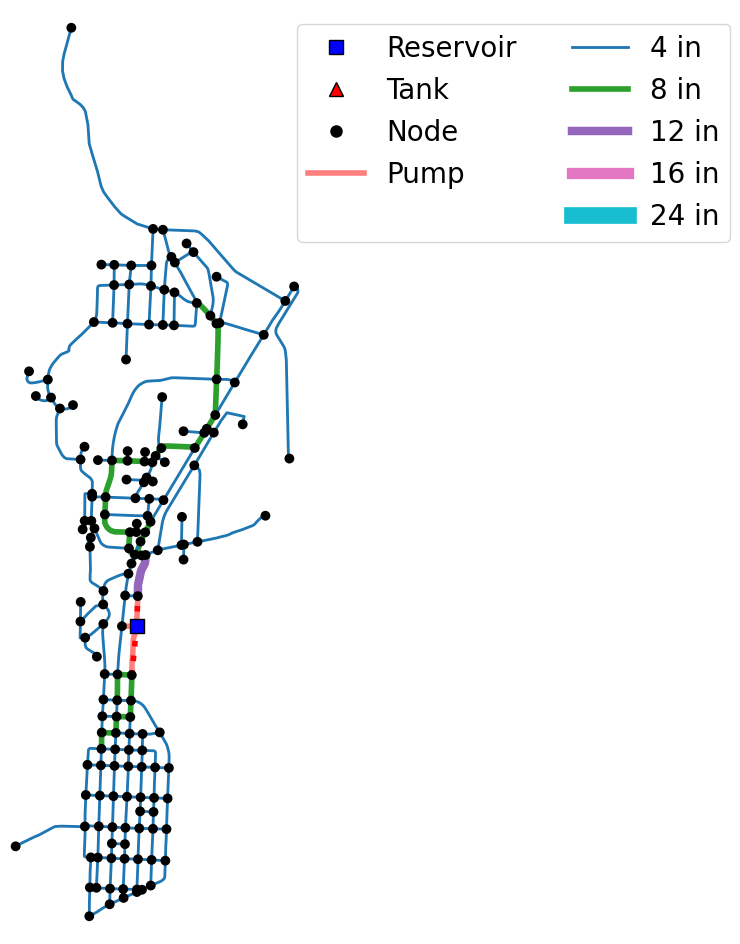

In [26]:
png.pretty_plot(epa_G5,legend_shift=2.5) # Network before fire flow

## Fire Flow Simulation

In [27]:
F = epa_G5.copy() # make a copy

In [28]:
hydr_locations = list(png.find_hydrant_locations(F,1)) # Distribute hydrants so all nodes are within 1 edge of a hydrant
hydr_demand = 30 # LPS

In [29]:
# Sort the hydrants so they can be run emenating from the source
hydr_locations = png.sort_by_proximity_to_special(F.to_undirected(),hydr_locations) 

In [30]:
for node in F.nodes: # Keep base demand for all nodes
    F.nodes[node]['base_demand'] = F.nodes[node]['demand']

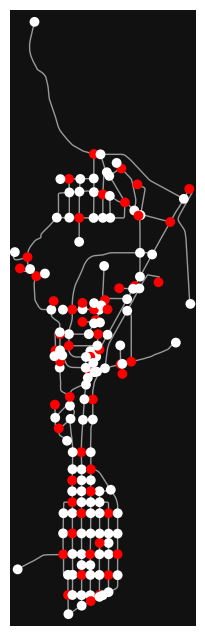

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
# Highlight hydrant locations
nc = ['r' if node in hydr_locations else "w" for node in F.nodes]
ox.plot_graph(F, node_color=nc, node_size=50, node_zorder=2, show=True)


In [32]:
epa_G_ff = png.run_epanet_algorithm(F,parameters) # Run in EPANET before saving
# png.G_to_inp(epa_G_ff,"Output/Seward_pre_hydrant.inp") # Save model Before hydrants

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


In [33]:
# parameter changes for fire hydrants
parameters['verbose'] = False # Don't print output
parameters['QMAX'] = 85 # The largest demand in the system 
parameters['BigM_Q'] = 86 # Big M contsraint
parameters['Gap%'] = 0 # Only accept optimal solutions
parameters['hydrant_demand'] = hydr_demand # Set hydrant demand
parameters['TimeLimit'] = 60 # Allow for only 60 seconds to find an optimal solution 

In [34]:
errors_ff = [png.calculate_pressure_dif(F)] # New tracker for fire flow info
costs_ff = [png.calc_cost(F,parameters)]

In [35]:
for i in range(len(hydr_locations)-1):
    if i == 0:
        hnt_path = "Output/testing_hnt_seward_4.hnt" # Save solutions
    else:
        hnt_path = "Output/testing_hnt_seward_fire.hnt"
    # try: # If model does not fail
    epa_G_ff,errors_ff,costs_ff = png.run_a_fire_flow(epa_G_ff,parameters,hydr_locations[i],hnt_path,"Output/testing_hnt_seward_fire.hnt",errors_ff,costs_ff,write=True)
    # png.delete_pump_head(epa_G_ff)
    epa_G_ff.graph['max_head'] = parameters['max_head'] 
    # except:
    #     for node in hydr_locations:
    #         epa_G_ff.nodes[node]['demand'] = epa_G_ff.nodes[node]['base_demand']
    #     print("\n\n\n\n\n\nMODEL FAILED\n\n\n\n\n")

Read hints from file Output/testing_hnt_seward_4.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire.hnt
Read hints from file Output/testing_hnt_seward_fire

1964.037177410326
[<matplotlib.lines.Line2D object at 0x000001F95D695C10>, <matplotlib.lines.Line2D object at 0x000001F95A035580>, <matplotlib.lines.Line2D object at 0x000001F95A035370>, <matplotlib.lines.Line2D object at 0x000001F95A1E5FD0>, <matplotlib.lines.Line2D object at 0x000001F95A035130>, <matplotlib.lines.Line2D object at 0x000001F95A1E5490>, <matplotlib.lines.Line2D object at 0x000001F95A1E51C0>, <matplotlib.lines.Line2D object at 0x000001F95A1E5550>, <matplotlib.lines.Line2D object at 0x000001F95A1E5190>, <matplotlib.lines.Line2D object at 0x000001F95A1E5D30>]


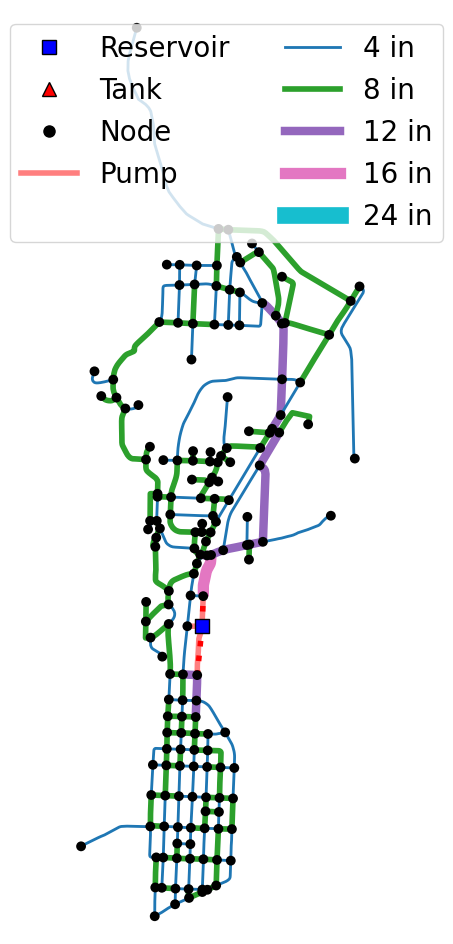

In [36]:
png.pretty_plot(epa_G_ff)

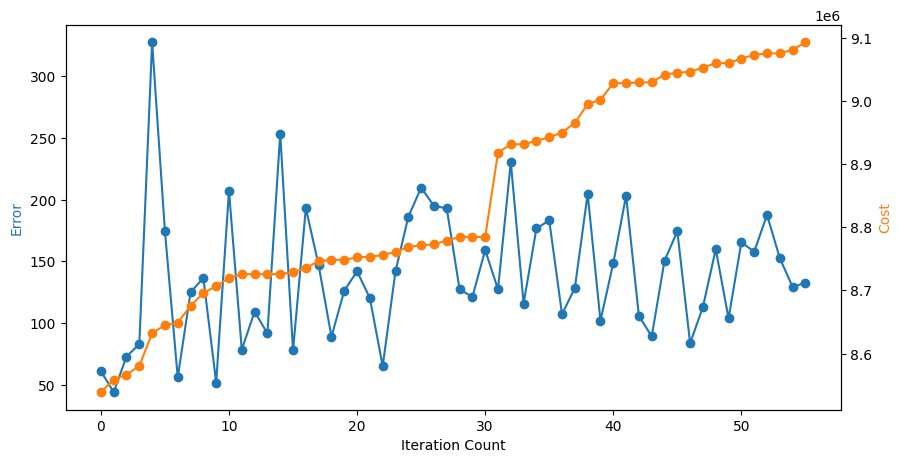

In [37]:
fig,ax = plt.subplots(figsize=(10,5))
ax1 = ax.twinx()
ax.plot(errors_ff,marker="o")
ax1.plot(costs_ff,color="C1",marker="o")
ax1.set_ylabel("Cost",color="C1")
ax.set_ylabel("Error",color="C0")
ax.set_xlabel("Iteration Count")
plt.show()#TODO: Make the graphics functions

In [38]:
final_G = epa_G_ff.copy()
png.set_reservoir_pressure_to_pump(final_G)

In [39]:
png.G_to_inp(final_G,"Output/Final_seward.inp")

In [40]:
time_stop = time.time()

In [41]:
f"Generating a network took {round((time_stop-time_start)/60,2)} minutes"

'Generating a network took 3.13 minutes'